# **"Анализ бронирования отеля (поиск инсайтов, составление рекомендаций стейкхолдерам, построение предиктивной модели отмен бронирования)"**

**Источник данных:** [Анализ бронирования отеля](https://www.kaggle.com/datasets/youssefaboelwafa/hotel-booking-cancellation-prediction)

#**Описание бизнес-задачи и ее актуальность:**

**Задача:**

Анализ данных бронирования отеля для выявления факторов, влияющих на отмены бронирований, что позволит разработать стратегии для минимизации потерь от невыполненных бронирований. Разработать модель для анализа и прогнозирования вероятности отмены бронирования отеля.

**Актуальность:**

Это поможет отелям более эффективно управлять инвентарем номеров, минимизировать потери от отмены бронирования и оптимизировать занятость.

**Круг стейкхолдеров и бизнес-требования:**

**1. Стейкхолдеры:**

Управление отеля, отдел маркетинга, финансовый отдел, служба по работе с клиентами, владелец отеля.

**2. Бизнес-требования:**

- Точность прогнозов отмены.

- Способность адаптироваться к изменяющимся рыночным условиям.

- Понимание факторов, влияющих на решение клиентов об отмене.

**Гипотезы для проверки:**

1. Более длительный срок бронирования увеличивает вероятность отмены.
2. Бронирования, совершенные через определенные каналы, имеют более высокую вероятность отмены.
3. Специальные запросы клиентов уменьшают вероятность отмены бронирования.
4. Сезонные факторы и местные события влияют на уровень отмен бронирований.
5. Модель может эффективно предсказывать отмены, помогая отелям снизить финансовые потери.

**Метрики для проверки гипотез и источники информации:**

Метрики:

- **Объемы Бронирования:** отслеживает общее количество бронирований за определенный период времени. Она важна для понимания общей производительности бизнеса, сезонных трендов и эффективности маркетинговых кампаний.

- **Объемы Отмен:** Следит за количеством отмененных бронирований в определенный временной промежуток. Эта метрика помогает оценить масштаб проблемы отмен и эффективность внедряемых мер по их снижению.

- **Процент отмен:** Показывает общий процент отмененных бронирований от общего числа бронирований за определенный период. Эта метрика важна для мониторинга общих тенденций и эффективности принимаемых мер.

- **Средний срок до отмены:** Отражает среднее количество дней между датой бронирования и отменой. Может использоваться для оптимизации политики бронирования и управления доходами.

**Источники данных:** Данные бронирования, включая даты, типы номеров, информацию о клиентах, предыдущие отмены и т.д.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from scipy.stats import spearmanr
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [ ]:
# Загрузка данных из файла
booking_data = pd.read_csv('booking.csv')
booking_data.head()

,Booking_ID,number of adults,number of children,number of weekend nights,number of week nights,type of meal,car parking space,room type,lead time,market segment type,repeated,P-C,P-not-C,average price,special requests,date of reservation,booking status
0,INN00001,1,1,2,5,Meal Plan 1,0,Room_Type 1,224,Offline,0,0,0,88.00,0,10/2/2015,Not_Canceled
1,INN00002,1,0,1,3,Not Selected,0,Room_Type 1,5,Online,0,0,0,106.68,1,11/6/2018,Not_Canceled
2,INN00003,2,1,1,3,Meal Plan 1,0,Room_Type 1,1,Online,0,0,0,50.00,0,2/28/2018,Canceled
3,INN00004,1,0,0,2,Meal Plan 1,0,Room_Type 1,211,Online,0,0,0,100.00,1,5/20/2017,Canceled
4,INN00005,1,0,1,2,Not Selected,0,Room_Type 1,48,Online,0,0,0,77.00,0,4/11/2018,Canceled


In [ ]:
# Предварительный просмотр данных
booking_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36285 entries, 0 to 36284
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Booking_ID                36285 non-null  object 
 1   number of adults          36285 non-null  int64  
 2   number of children        36285 non-null  int64  
 3   number of weekend nights  36285 non-null  int64  
 4   number of week nights     36285 non-null  int64  
 5   type of meal              36285 non-null  object 
 6   car parking space         36285 non-null  int64  
 7   room type                 36285 non-null  object 
 8   lead time                 36285 non-null  int64  
 9   market segment type       36285 non-null  object 
 10  repeated                  36285 non-null  int64  
 11  P-C                       36285 non-null  int64  
 12  P-not-C                   36285 non-null  int64  
 13  average price             36285 non-null  float64
 14  specia

**Общее количество записей:** 36,285.

**Колонки:** Всего 17 колонок, включая:

- **Booking_ID**: Идентификатор бронирования.

- **number of adults**: Количество взрослых.

- **number of children**: Количество детей.

- **number of weekend nights и number of week nights**: Количество ночей на выходных и в будни.

- **type of meal**: Тип питания.

- **car parking space**: Наличие места для парковки.

- **room type**: Тип номера.

- **lead time**: Время в днях между датой бронирования и датой заезда.

- **market segment type**: Тип рыночного сегмента.

- **repeated**: Повторное бронирование.

- **P-C и P-not-C**: Количественные показатели

- **average price**: Средняя цена за ночь.

- **special requests**: Количество специальных запросов.

- **date of reservation**: Дата бронирования.

- **booking status**: Статус бронирования (отменено/не отменено).

# Предварительный анализ данных:

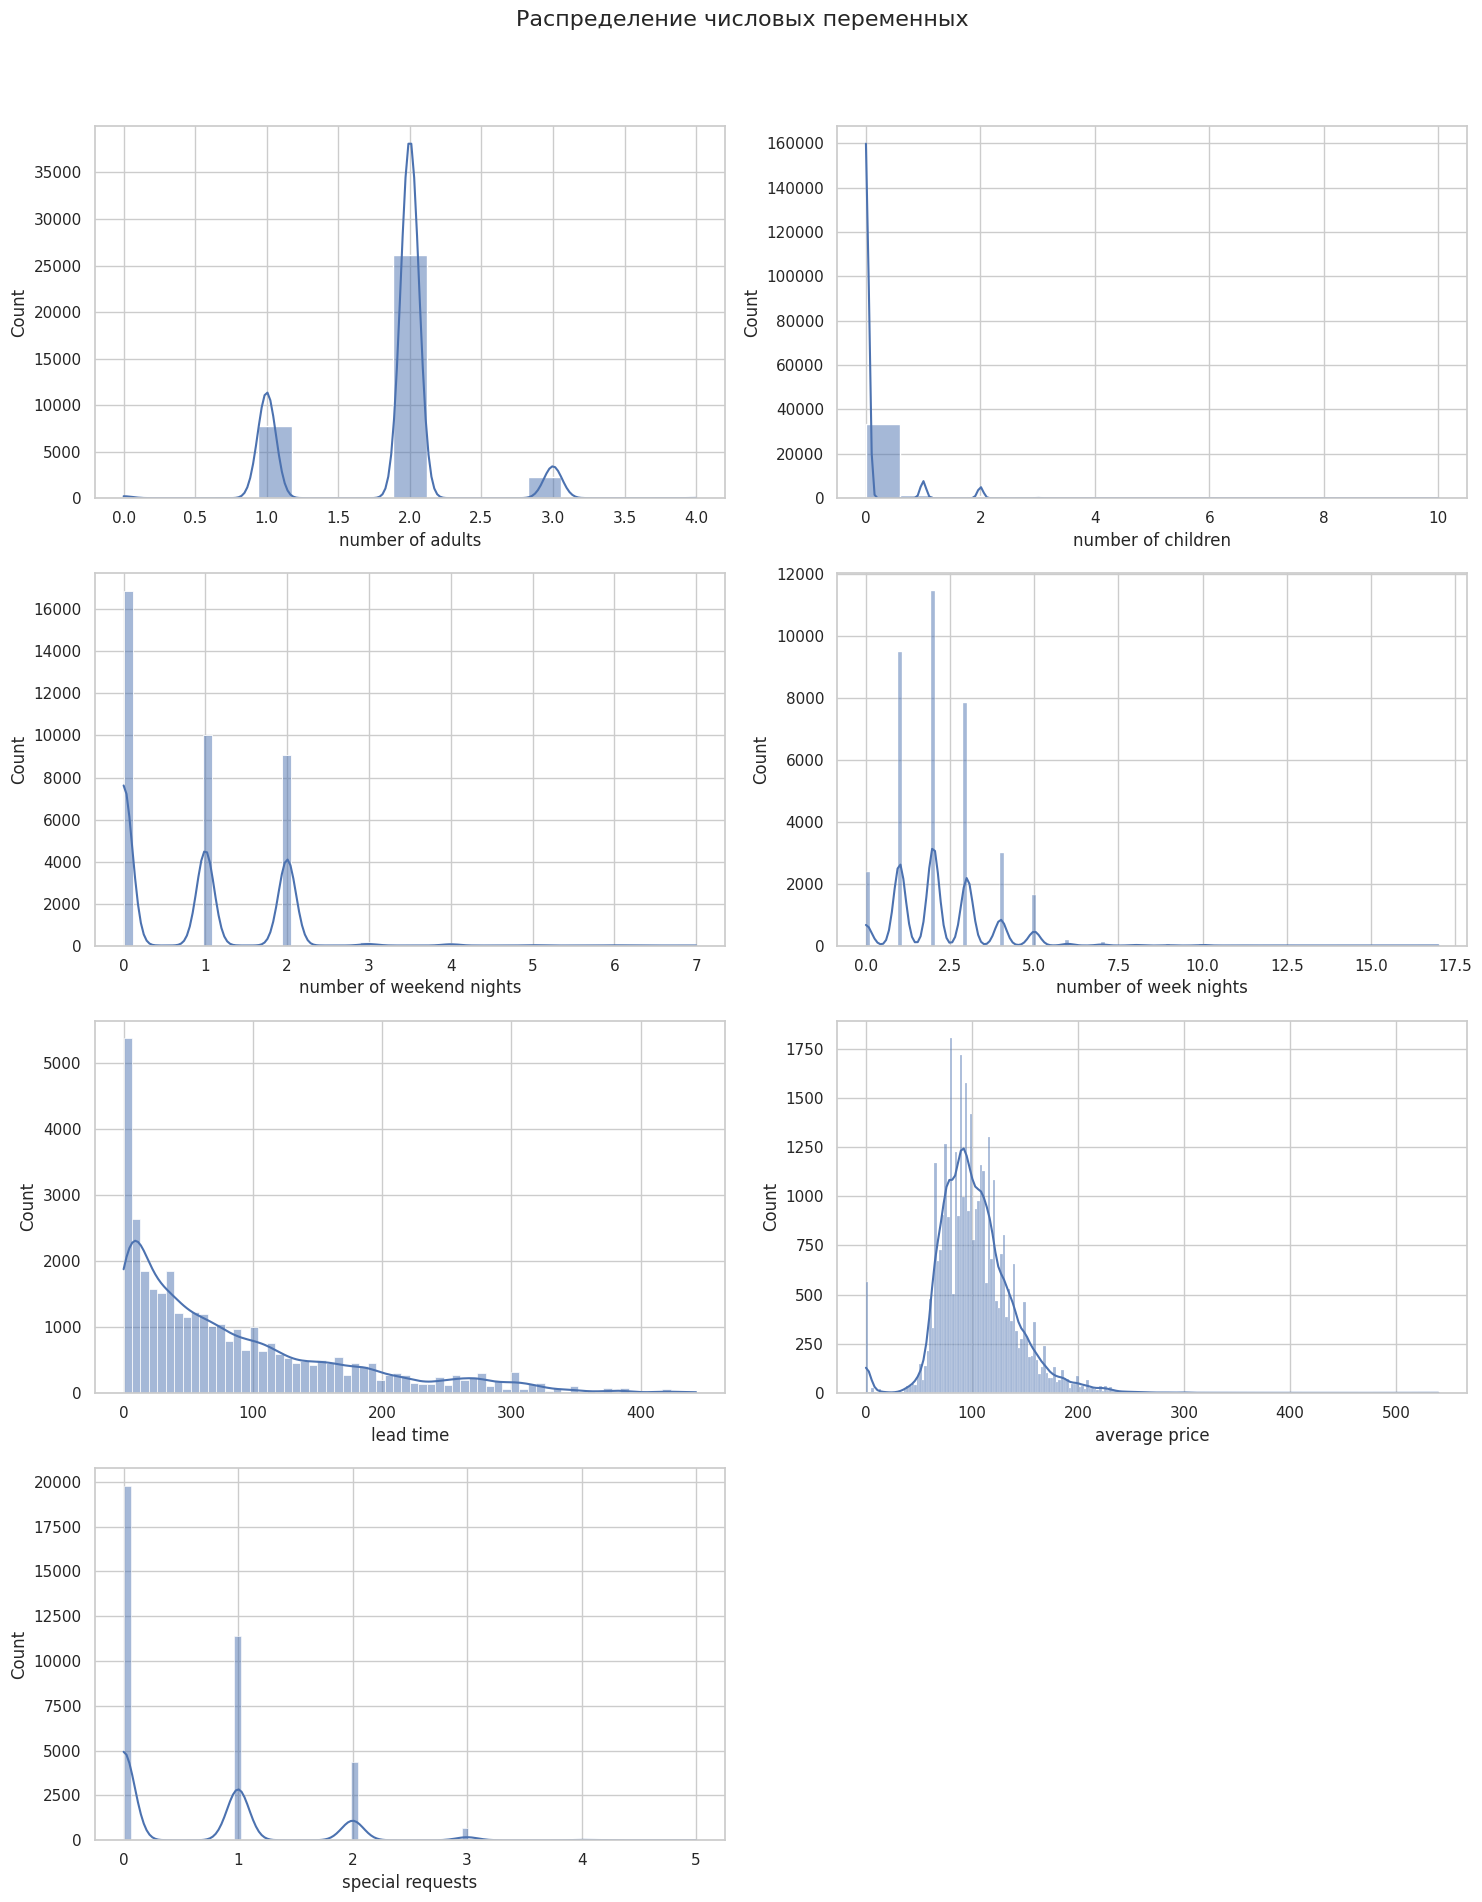

In [ ]:
# Настройка визуализации
sns.set(style="whitegrid")

# Визуализация распределения основных числовых переменных
numeric_columns = ['number of adults', 'number of children', 'number of weekend nights',
                   'number of week nights', 'lead time', 'average price', 'special requests']

fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(15, 20))
fig.suptitle('Распределение числовых переменных', fontsize=16)

for i, col in enumerate(numeric_columns):
    sns.histplot(booking_data[col], kde=True, ax=axes[i//2, i%2])

# Удаление пустого подграфика
axes[3, 1].set_visible(False)

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

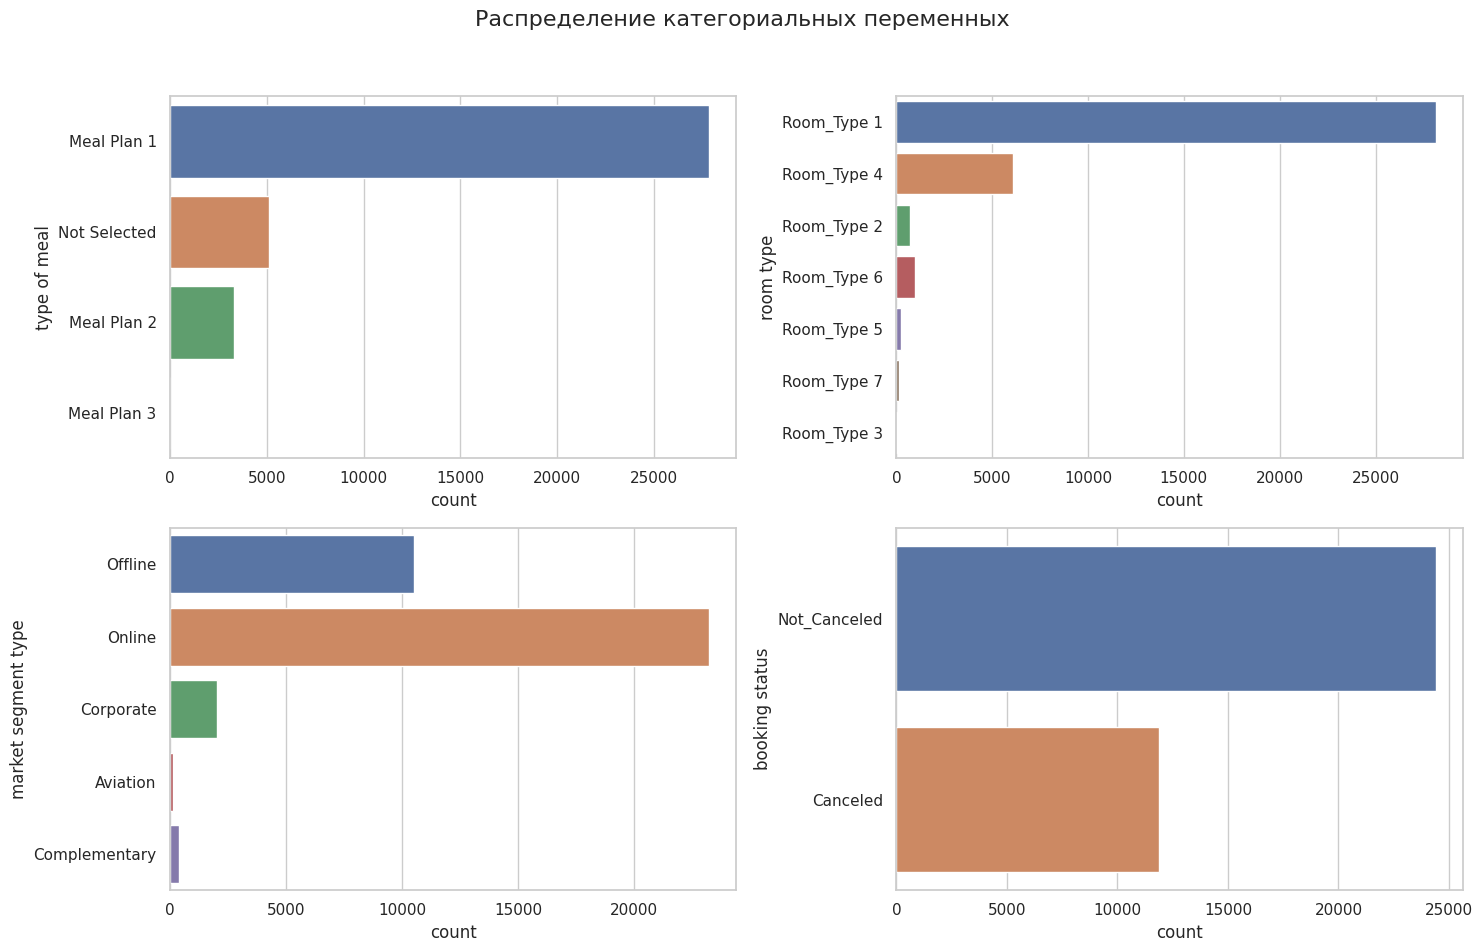

In [ ]:
# Анализ категориальных переменных
categorical_columns = ['type of meal', 'room type', 'market segment type', 'booking status']

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 10))
fig.suptitle('Распределение категориальных переменных', fontsize=16)

for i, col in enumerate(categorical_columns):
    sns.countplot(y=booking_data[col], ax=axes[i//2, i%2])

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

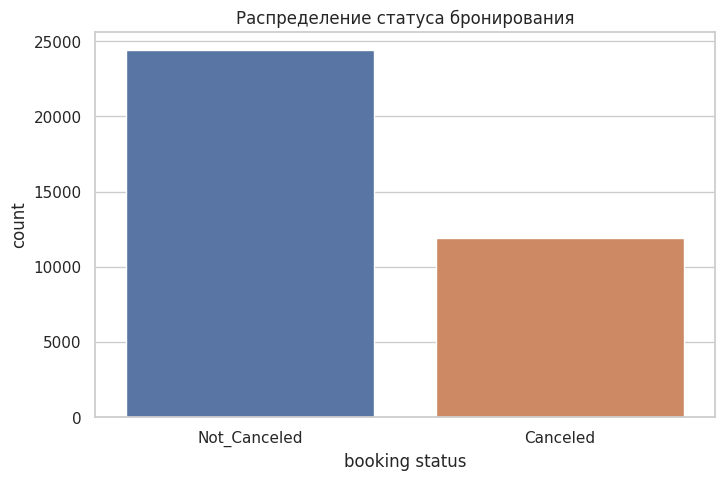

In [ ]:
# Анализ целевой переменной (статус бронирования)
plt.figure(figsize=(8, 5))
sns.countplot(x='booking status', data=booking_data)
plt.title('Распределение статуса бронирования')
plt.show()

**Распределение числовых переменных:**

- Количество взрослых и детей: В большинстве случаев бронируются номера для одного или двух взрослых, количество детей в большинстве случаев равно нулю.

- Количество ночей (выходные и будни): Видно, что бронирования чаще происходят на короткие периоды, особенно на выходные.

- Время до заезда (lead time): Распределение показывает, что многие бронирования делаются за короткий промежуток времени до заезда, однако есть и длительные периоды ожидания.

- Средняя цена: Большинство бронирований имеют среднюю стоимость в довольно узком диапазоне, что указывает на стандартизированный ценовой диапазон.

- Специальные запросы: Большинство бронирований не содержат специальных запросов.

**Распределение категориальных переменных:**

- Тип питания: Различные типы питания представлены, но есть один или два доминирующих вида.

- Тип номера: Существует несколько типов номеров, среди которых есть явные предпочтения.

- Рыночный сегмент: Различные рыночные сегменты представлены, что может быть полезно для понимания различных групп клиентов.

- Статус бронирования: Есть явное разделение между отмененными и не отмененными бронированиями, что является ключевым аспектом для нашего анализа.

**Анализ целевой переменной (статус бронирования):**

Распределение показывает количество отмененных и не отмененных бронирований. Это будет ключевой переменной для нашего прогнозирования.

# Очистка и подготовка данных:

In [ ]:
# Очистка и подготовка данных

# 1. Проверка наличия пропущенных значений
missing_values = booking_data.isnull().sum()

# 2. Кодирование категориальных переменных
# Преобразование целевой переменной в числовой формат (0 и 1)
booking_data['booking status'] = booking_data['booking status'].map({'Canceled': 1, 'Not_Canceled': 0})

# Преобразование других категориальных переменных с помощью One-Hot Encoding
categorical_features = ['type of meal', 'room type', 'market segment type']
booking_data_encoded = pd.get_dummies(booking_data, columns=categorical_features)

# Просмотр обновленных данных
booking_data_encoded.info(), missing_values[missing_values > 0]


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36285 entries, 0 to 36284
Data columns (total 30 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Booking_ID                         36285 non-null  object 
 1   number of adults                   36285 non-null  int64  
 2   number of children                 36285 non-null  int64  
 3   number of weekend nights           36285 non-null  int64  
 4   number of week nights              36285 non-null  int64  
 5   car parking space                  36285 non-null  int64  
 6   lead time                          36285 non-null  int64  
 7   repeated                           36285 non-null  int64  
 8   P-C                                36285 non-null  int64  
 9   P-not-C                            36285 non-null  int64  
 10  average price                      36285 non-null  float64
 11  special requests                   36285 non-null  int

(None, Series([], dtype: int64))

In [ ]:
booking_data_encoded.head()

,Booking_ID,number of adults,number of children,number of weekend nights,number of week nights,car parking space,lead time,repeated,P-C,P-not-C,...,room type_Room_Type 3,room type_Room_Type 4,room type_Room_Type 5,room type_Room_Type 6,room type_Room_Type 7,market segment type_Aviation,market segment type_Complementary,market segment type_Corporate,market segment type_Offline,market segment type_Online
0,INN00001,1,1,2,5,0,224,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,INN00002,1,0,1,3,0,5,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,INN00003,2,1,1,3,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,INN00004,1,0,0,2,0,211,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,INN00005,1,0,1,2,0,48,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [ ]:
booking_data_encoded.describe()

,number of adults,number of children,number of weekend nights,number of week nights,car parking space,lead time,repeated,P-C,P-not-C,average price,...,room type_Room_Type 3,room type_Room_Type 4,room type_Room_Type 5,room type_Room_Type 6,room type_Room_Type 7,market segment type_Aviation,market segment type_Complementary,market segment type_Corporate,market segment type_Offline,market segment type_Online
count,36285.000000,36285.000000,36285.000000,36285.000000,36285.000000,36285.000000,36285.000000,36285.000000,36285.000000,36285.000000,...,36285.000000,36285.000000,36285.000000,36285.000000,36285.000000,36285.000000,36285.000000,36285.000000,36285.000000,36285.000000
mean,1.844839,0.105360,0.810693,2.204602,0.030977,85.239851,0.025630,0.023343,0.153369,103.421636,...,0.000193,0.166984,0.007303,0.026623,0.004354,0.003445,0.010776,0.055588,0.290230,0.639961
std,0.518813,0.402704,0.870590,1.410946,0.173258,85.938796,0.158032,0.368281,1.753931,35.086469,...,0.013888,0.372966,0.085148,0.160980,0.065845,0.058593,0.103247,0.229127,0.453875,0.480018
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,0.000000,0.000000,1.000000,0.000000,17.000000,0.000000,0.000000,0.000000,80.300000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2.000000,0.000000,1.000000,2.000000,0.000000,57.000000,0.000000,0.000000,0.000000,99.450000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,2.000000,0.000000,2.000000,3.000000,0.000000,126.000000,0.000000,0.000000,0.000000,120.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
max,4.000000,10.000000,7.000000,17.000000,1.000000,443.000000,1.000000,13.000000,58.000000,540.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


**Пропущенные значения:**

Проверка на наличие пропущенных значений показала, что в данных нет пропусков.

**Кодирование категориальных переменных:**

**Целевая переменная booking status была преобразована в числовой формат:** 'Canceled' стало 1, а 'Not_Canceled' — 0.

Применено one-hot кодирование для других категориальных переменных (type of meal, room type, market segment type). Это преобразование создало дополнительные столбцы для каждой категории в этих переменных.

# Корреляционный анализ:

<ipython-input-51-1cdcb5cc9020>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = booking_data_encoded.corr()


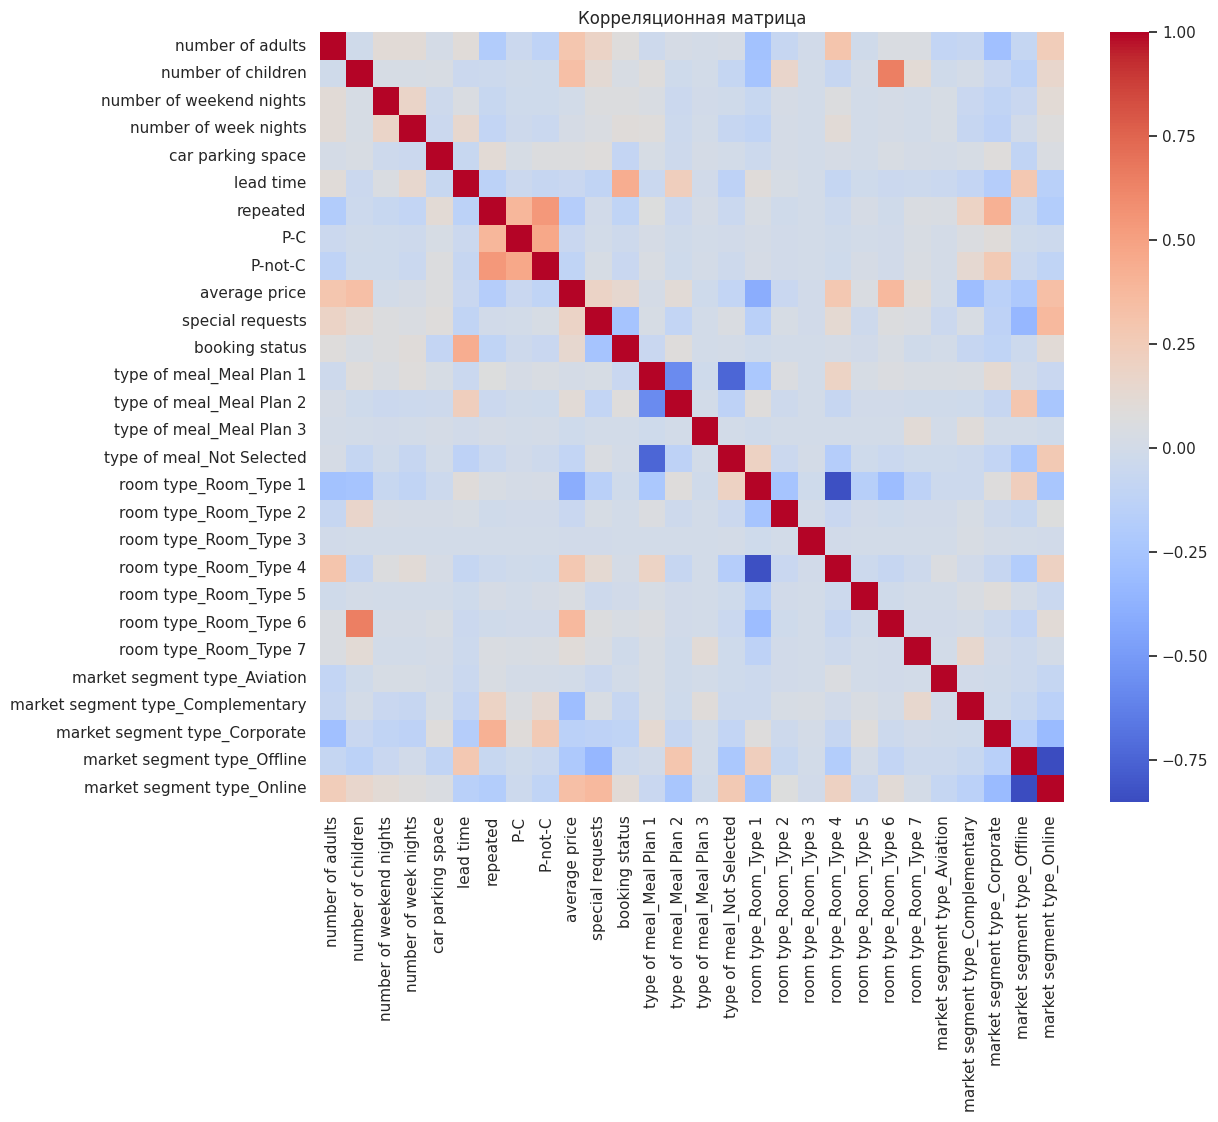

lead time                            0.438491
average price                        0.142433
market segment type_Online           0.106362
number of week nights                0.092824
number of adults                     0.086774
type of meal_Meal Plan 2             0.086468
number of weekend nights             0.061489
number of children                   0.033007
room type_Room_Type 6                0.032640
room type_Room_Type 4                0.013182
type of meal_Not Selected            0.003112
room type_Room_Type 2                0.000542
room type_Room_Type 3               -0.001241
type of meal_Meal Plan 3            -0.003193
market segment type_Aviation        -0.003965
room type_Room_Type 5               -0.010226
room type_Room_Type 7               -0.014063
room type_Room_Type 1               -0.020205
P-C                                 -0.033725
market segment type_Offline         -0.038365
P-not-C                             -0.060174
type of meal_Meal Plan 1          

In [ ]:
# Корреляционный анализ
correlation_matrix = booking_data_encoded.corr()

# Визуализация корреляционной матрицы
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, cmap='coolwarm', annot=False, fmt=".1f")
plt.title('Корреляционная матрица')
plt.show()

# Отбор корреляций, относящихся к целевой переменной 'booking status'
target_correlation = correlation_matrix['booking status'].sort_values(ascending=False)
target_correlation = target_correlation.drop(index='booking status') # Удаление корреляции с самой собой

target_correlation

**Корреляционный анализ выявил следующие интересные взаимосвязи между переменными и статусом бронирования (отмена/не отмена):**

**Наиболее значимые положительные корреляции:**

- lead time: Самая сильная положительная корреляция, что означает, что чем дольше период между бронированием и заездом, тем выше вероятность отмены.
- average price: Выше средняя цена, выше вероятность отмены.
- market segment type_Online: Бронирования через онлайн-сегменты склонны к более высоким отменам.

Наиболее значимые отрицательные корреляции:

- special requests: Меньше специальных запросов связано с более высокой вероятностью отмены.
- market segment type_Corporate: Корпоративные бронирования имеют меньше шансов быть отмененными.
- repeated: Повторные бронирования менее склонны к отмене.
- car parking space: Наличие места для парковки связано с меньшей вероятностью отмены.

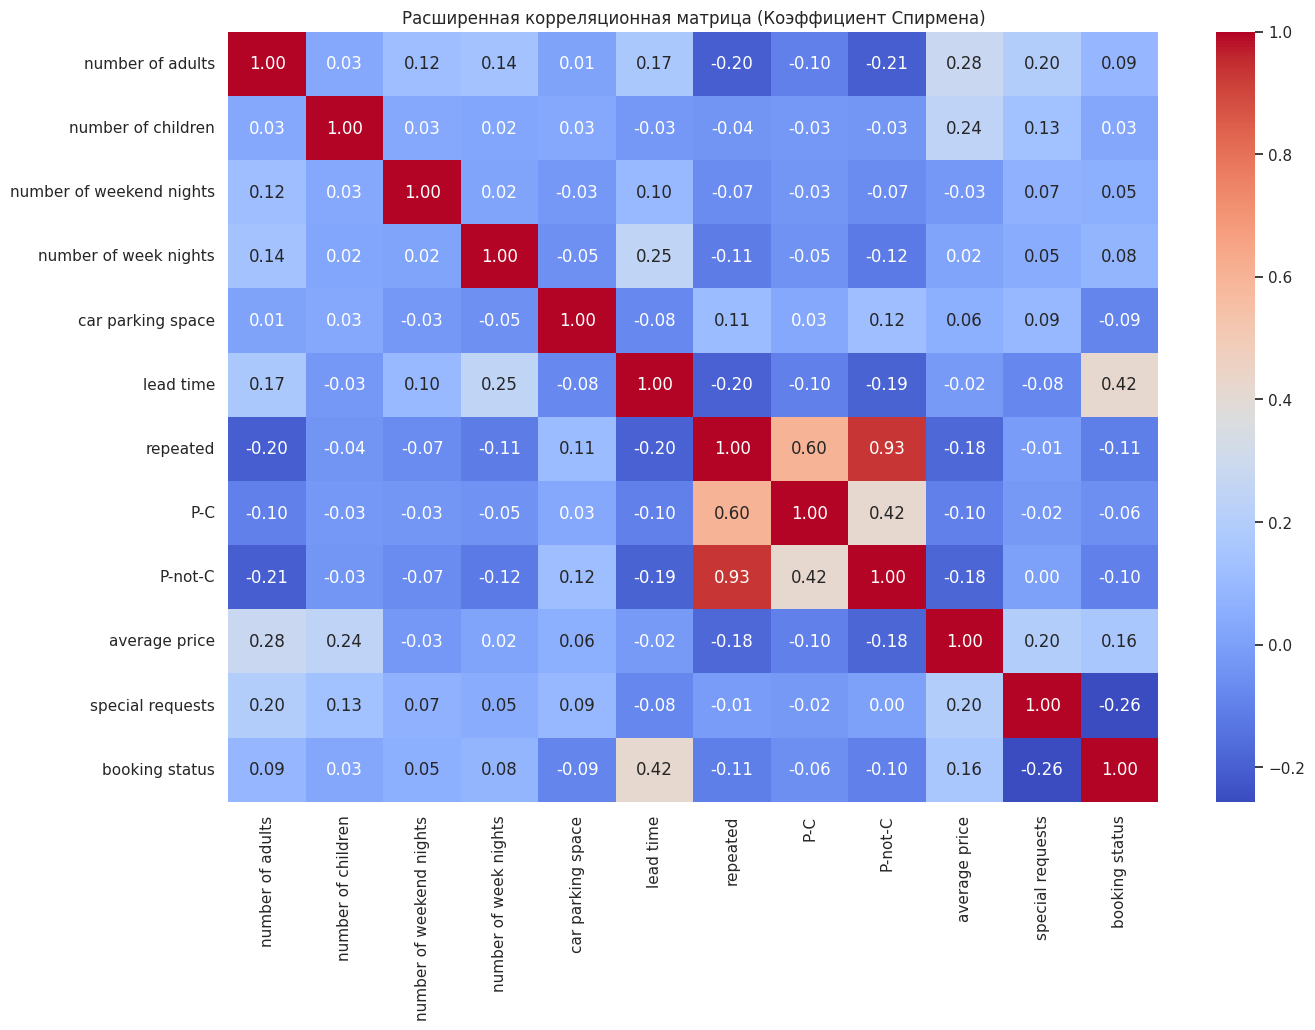

In [ ]:
# Извлечение числовых колонок
numeric_columns = booking_data_encoded.select_dtypes(include=['int64', 'float64']).columns

# Инициализация пустой матрицы корреляций
corr_matrix_spearman = pd.DataFrame(data=np.zeros((len(numeric_columns), len(numeric_columns))),
                                    columns=numeric_columns,
                                    index=numeric_columns)

# Расчет корреляций Спирмена для каждой пары числовых переменных
for col1 in numeric_columns:
    for col2 in numeric_columns:
        correlation, _ = spearmanr(booking_data_encoded[col1], booking_data_encoded[col2])
        corr_matrix_spearman.loc[col1, col2] = correlation

# Визуализация расширенной корреляционной матрицы
plt.figure(figsize=(15, 10))
sns.heatmap(corr_matrix_spearman, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Расширенная корреляционная матрица (Коэффициент Спирмена)')
plt.show()

# Углубленный исследовательский анализ

При попытке провести более глубокий исследовательский анализ данных (EDA) возникла ошибка при преобразовании дат. Это связано с неправильным форматом даты в датасете, например, существованием даты "29 февраля 2018 года", которой на самом деле не было, так как 2018 год не был високосным.

In [ ]:
# Исправление ошибочных дат в датасете
# Сначала найдем строки с ошибочными датами

# Преобразование даты с обработкой исключений
def parse_date(date):
    try:
        return pd.to_datetime(date, errors='coerce')
    except ValueError:
        return None

# Применение функции к столбцу 'date of reservation'
booking_data_encoded['date of reservation'] = booking_data_encoded['date of reservation'].apply(parse_date)

# Отбрасываем строки с некорректными датами
booking_data_encoded = booking_data_encoded.dropna(subset=['date of reservation'])

# Проверяем преобразования
booking_data_encoded.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 36248 entries, 0 to 36284
Data columns (total 30 columns):
 #   Column                             Non-Null Count  Dtype         
---  ------                             --------------  -----         
 0   Booking_ID                         36248 non-null  object        
 1   number of adults                   36248 non-null  int64         
 2   number of children                 36248 non-null  int64         
 3   number of weekend nights           36248 non-null  int64         
 4   number of week nights              36248 non-null  int64         
 5   car parking space                  36248 non-null  int64         
 6   lead time                          36248 non-null  int64         
 7   repeated                           36248 non-null  int64         
 8   P-C                                36248 non-null  int64         
 9   P-not-C                            36248 non-null  int64         
 10  average price                     

In [ ]:
# Расчет процента отмен
total_bookings = len(booking_data)
cancellations = booking_data['booking status'].sum()
cancellation_rate = (cancellations / total_bookings) * 100

# Расчет среднего срока до отмены
if 'lead time' in booking_data.columns:
    average_lead_time_to_cancellation = booking_data.loc[booking_data['booking status'] == 1, 'lead time'].mean()
else:
    average_lead_time_to_cancellation = None

# Числовые результаты для проверки
print(f"Процент отмен бронирования:: {cancellation_rate}")
print(f"Средний срок до отмены бронирования: {average_lead_time_to_cancellation}")

Процент отмен бронирования:: 32.76560562215792
Средний срок до отмены бронирования: 139.21961476995543


**Процент отмен бронирования:**

Процент отмен бронирования составляет 32.765%. Это означает, что более трети всех бронирований в исследуемом наборе данных были отменены. Эта цифра может быть важной для оценки общей эффективности управления бронированиями и может указывать на потребность в улучшении условий бронирования или политик отмены, чтобы снизить этот показатель.

**Средний срок до отмены бронирования:**

Средний срок до отмены бронирования равен 139 дней. Это значение представляет среднее количество дней от момента бронирования до момента его отмены. Такой длительный средний срок может свидетельствовать о том, что гости часто меняют свои планы за значительное время до предполагаемой даты заезда, что предоставляет отелю окно возможностей для перепродажи номеров или предложения альтернативных услуг для предотвращения потери дохода.

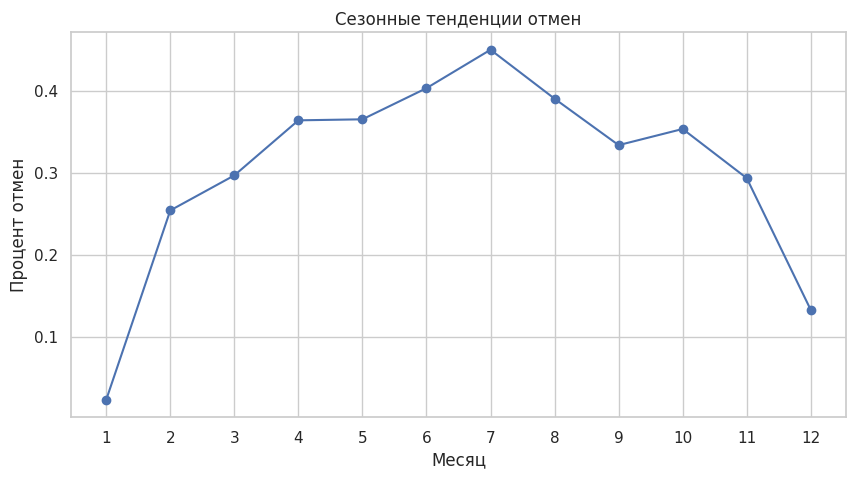

In [ ]:
# Выполнение анализа временных тенденций
booking_data_encoded['month'] = booking_data_encoded['date of reservation'].dt.month
monthly_cancellation = booking_data_encoded.groupby('month')['booking status'].mean()

# Визуализация сезонных тенденций отмен
plt.figure(figsize=(10, 5))
monthly_cancellation.plot(kind='line', marker='o')
plt.title('Сезонные тенденции отмен')
plt.xlabel('Месяц')
plt.ylabel('Процент отмен')
plt.xticks(range(1, 13))
plt.show()

**Сезонные Тенденции Отмен:**

График: Линейный график, показывающий процент отмен по месяцам года.

Наблюдения:
Существует явная сезонная тенденция в отменах бронирований, с пиками и спадами в определенные месяцы.
Это может указывать на влияние факторов, таких как погода, праздники, местные события или школьные каникулы.

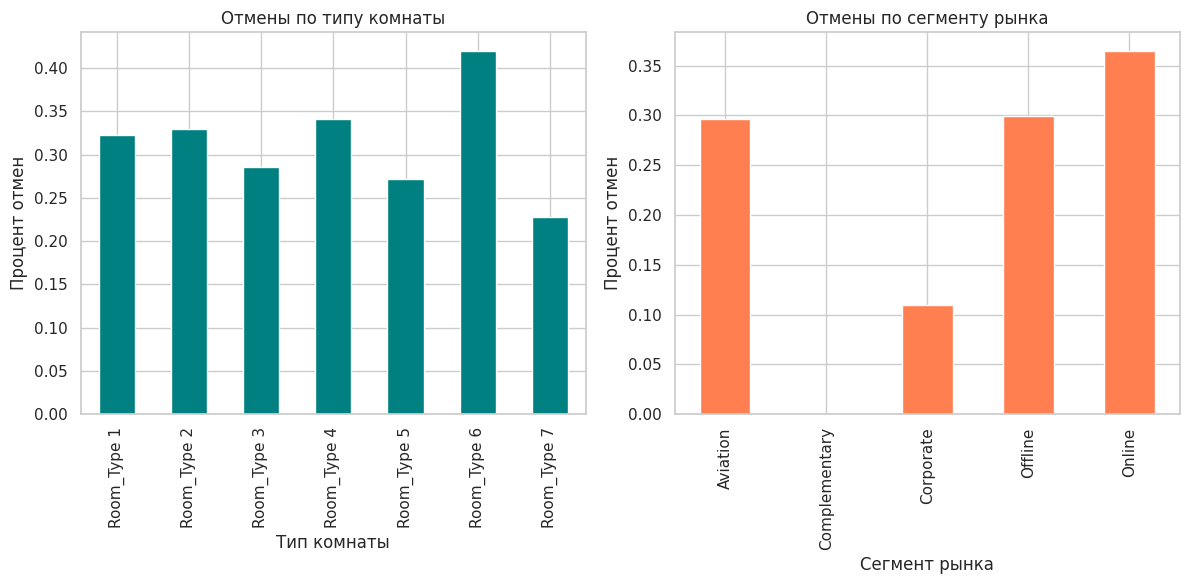

In [ ]:
# Преобразование 'booking status' в числовой формат, если это необходимо
if booking_data['booking status'].dtype == 'object':
    booking_data['booking status'] = booking_data['booking status'].map({'Canceled': 1, 'Not_Canceled': 0})

# Проверка и корректировка других столбцов, используемых в анализе
# Преобразование 'room type' и 'market segment type' в категориальные типы данных
booking_data['room type'] = booking_data['room type'].astype('category')
booking_data['market segment type'] = booking_data['market segment type'].astype('category')

# Анализ распределения отмен по типу комнаты и сегменту рынка
cancellation_by_room_type = booking_data.groupby('room type')['booking status'].mean()
cancellation_by_market_segment = booking_data.groupby('market segment type')['booking status'].mean()

# Визуализация результатов
plt.figure(figsize=(18, 6))

# Отмены по типу комнаты
plt.subplot(1, 3, 1)
cancellation_by_room_type.plot(kind='bar', color='teal')
plt.title('Отмены по типу комнаты')
plt.xlabel('Тип комнаты')
plt.ylabel('Процент отмен')

# Отмены по сегменту рынка
plt.subplot(1, 3, 2)
cancellation_by_market_segment.plot(kind='bar', color='coral')
plt.title('Отмены по сегменту рынка')
plt.xlabel('Сегмент рынка')
plt.ylabel('Процент отмен')

plt.tight_layout()
plt.show()



Рассмотрим результаты углубленного анализа данных бронирования отеля по предоставленным графикам:

1. **Отмены по Типу Комнаты:**

График: Бар-чарт, показывающий процент отмен для каждого типа комнаты.

Наблюдения:
Некоторые типы комнат имеют более высокий процент отмен, что может указывать на специфические характеристики или ценовые категории этих комнат.
Возможно, на отмены влияют факторы, такие как стоимость, размер или расположение комнаты.

2. **Отмены по Сегменту Рынка:**

График: Бар-чарт, демонстрирующий процент отмен в различных сегментах рынка.

Наблюдения:
Некоторые рыночные сегменты, возможно, более склонны к отменам, что может быть связано с типом клиентов, бронированием через определенные каналы или другими факторами.
Анализ этих сегментов может помочь в разработке более эффективных стратегий управления бронированием и маркетинга.

**Выводы и Практическое Применение:**

Анализ отмен по типу комнаты и сегменту рынка может помочь отелю лучше понять своих клиентов и оптимизировать управление инвентарем и ценообразование.
Понимание сезонных тенденций в отменах бронирований важно для планирования персонала, запасов и маркетинговых акций.
Отель может использовать эти данные для разработки целевых стратегий, направленных на снижение отмен и повышение общей прибыльности.

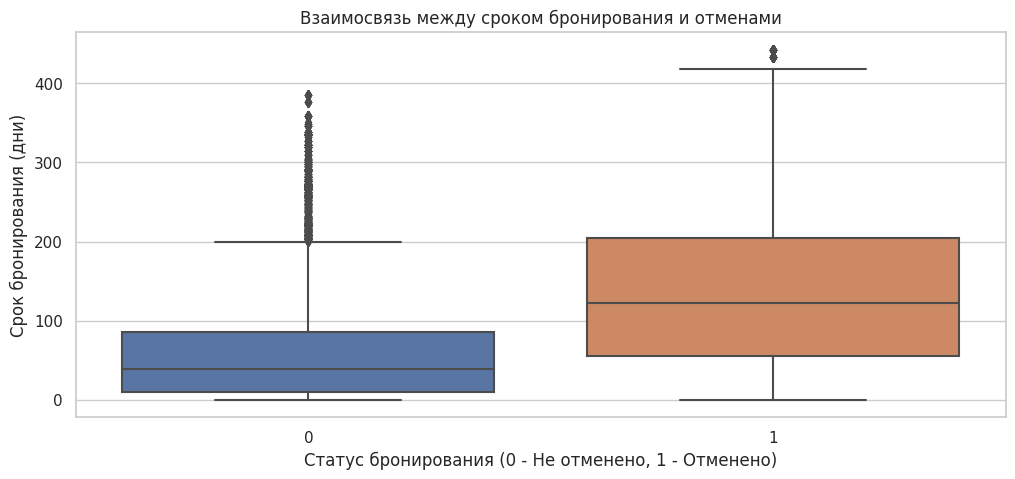

In [ ]:
# Анализ взаимосвязи между сроком бронирования (lead time) и отменами
plt.figure(figsize=(12, 5))
sns.boxplot(x='booking status', y='lead time', data=booking_data)
plt.title('Взаимосвязь между сроком бронирования и отменами')
plt.xlabel('Статус бронирования (0 - Не отменено, 1 - Отменено)')
plt.ylabel('Срок бронирования (дни)')
plt.show()

**Взаимосвязь между Сроком Бронирования и Отменами:**

График: Boxplot, сравнивающий сроки бронирования для отмененных и неотмененных бронирований.

Для отмененных бронирований срок бронирования, как правило, длиннее. Это может указывать на то, что более длительное время между бронированием и заездом увеличивает вероятность отмены.
Размах значений (от нижнего до верхнего квартиля) для отмененных бронирований шире, что свидетельствует о большей изменчивости сроков бронирования.

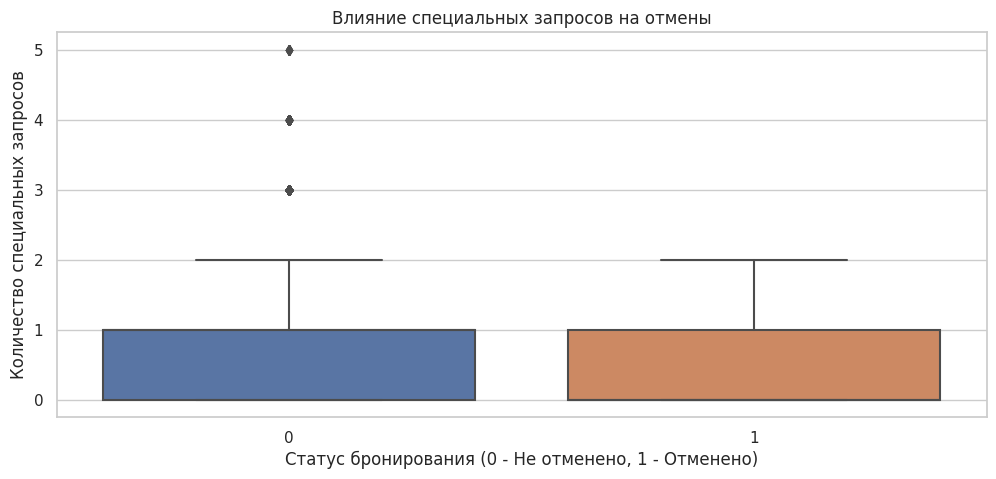

In [ ]:
# Анализ влияния специальных запросов на отмены
plt.figure(figsize=(12, 5))
sns.boxplot(x='booking status', y='special requests', data=booking_data)
plt.title('Влияние специальных запросов на отмены')
plt.xlabel('Статус бронирования (0 - Не отменено, 1 - Отменено)')
plt.ylabel('Количество специальных запросов')
plt.show()

**Влияние Специальных Запросов на Отмены:**

График: Boxplot, отображающий количество специальных запросов в отмененных и неотмененных бронированиях.

На первый взгляд, кажется, что бронирования с меньшим количеством специальных запросов чаще отменяются. Это может указывать на то, что клиенты с конкретными требованиями и предпочтениями реже отменяют бронирование.

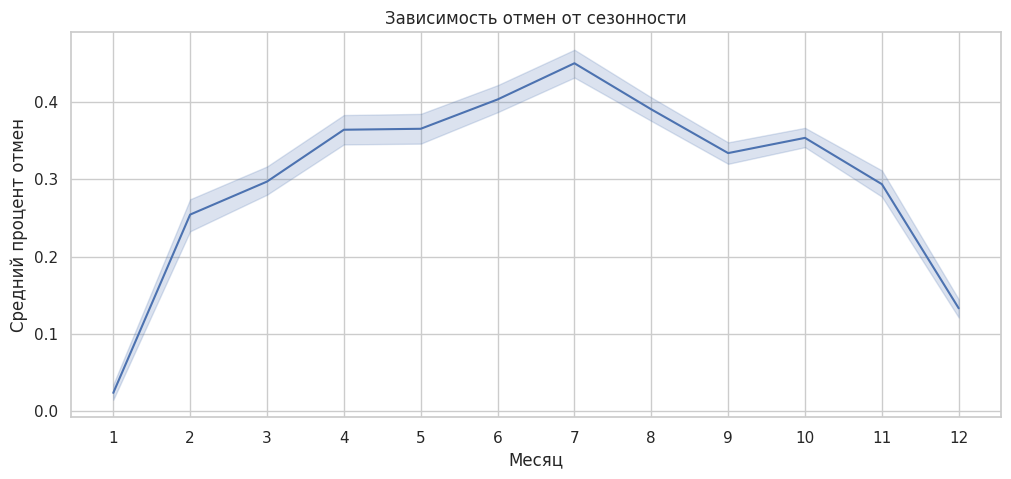

In [ ]:
# Анализ зависимости отмен от сезонности
plt.figure(figsize=(12, 5))
sns.lineplot(x='month', y='booking status', data=booking_data_encoded, estimator='mean')
plt.title('Зависимость отмен от сезонности')
plt.xlabel('Месяц')
plt.ylabel('Средний процент отмен')
plt.xticks(range(1, 13))
plt.show()

**Зависимость Отмен от Сезонности:**

График: Линейный график, показывающий средний процент отмен по месяцам.

На графике видны сезонные колебания в проценте отмен бронирований. Возможно, в некоторые месяцы происходит больше отмен из-за погодных условий, праздников или других сезонных факторов.

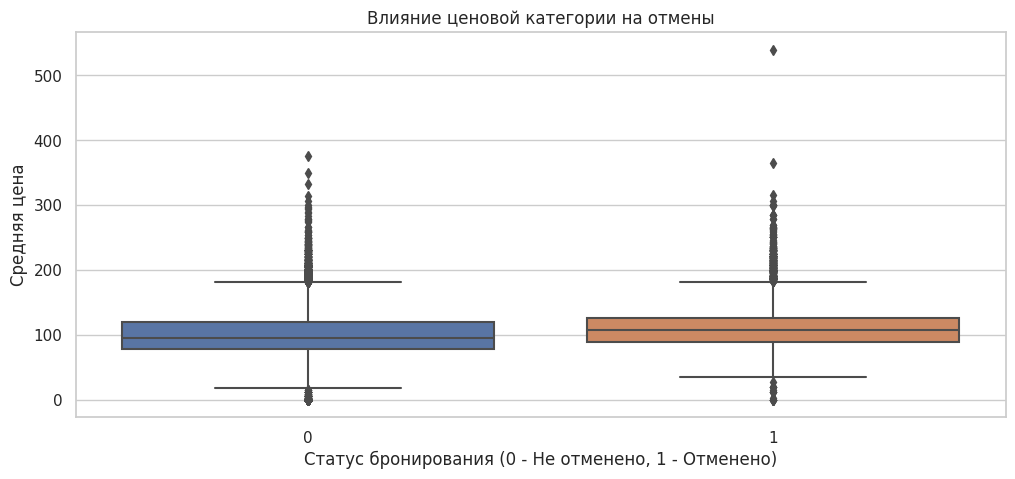

In [ ]:
# Анализ влияния ценовой категории на отмены
plt.figure(figsize=(12, 5))
sns.boxplot(x='booking status', y='average price', data=booking_data)
plt.title('Влияние ценовой категории на отмены')
plt.xlabel('Статус бронирования (0 - Не отменено, 1 - Отменено)')
plt.ylabel('Средняя цена')
plt.show()

**Влияние Ценовой Категории на Отмены:**

График: Boxplot, сравнивающий средние цены для отмененных и неотмененных бронирований.

- Видно, что распределение цен для отмененных бронирований немного отличается от неотмененных. Это может указывать на то, что более высокая цена бронирования связана с большей вероятностью отмены.
- Наличие выбросов особенно заметно в категории отмененных бронирований, что может свидетельствовать о чувствительности клиентов к цене в отношении решения об отмене.

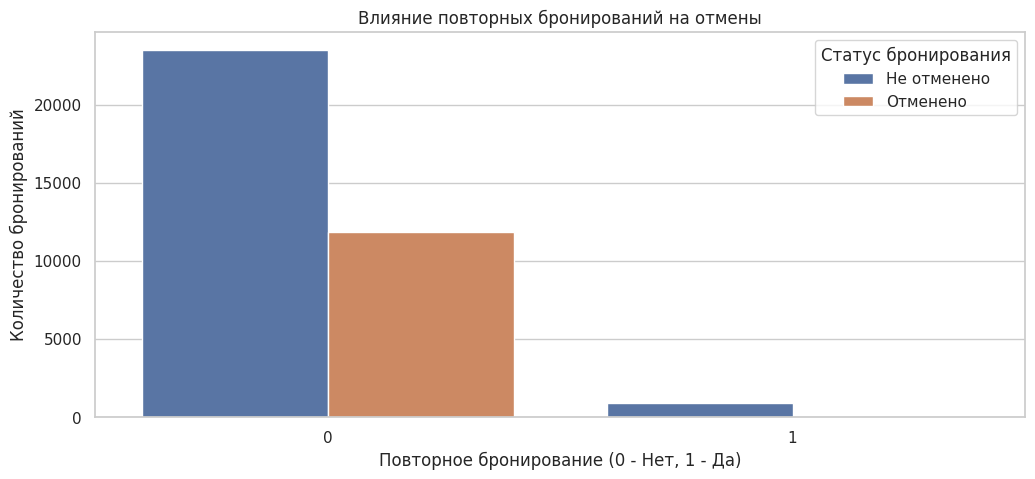

In [ ]:
# Анализ влияния повторных бронирований на отмены
# У нас есть столбец 'repeated' (повторное бронирование), где 1 означает повторное бронирование, а 0 - нет

plt.figure(figsize=(12, 5))
sns.countplot(x='repeated', hue='booking status', data=booking_data)
plt.title('Влияние повторных бронирований на отмены')
plt.xlabel('Повторное бронирование (0 - Нет, 1 - Да)')
plt.ylabel('Количество бронирований')
plt.legend(title='Статус бронирования', labels=['Не отменено', 'Отменено'])
plt.show()

**Влияние Повторных Бронирований на Отмены:**

График: Столбчатая диаграмма, показывающая количество бронирований (отмененных и неотмененных) в зависимости от того, являлись ли они повторными.

Из графика видно, что повторные бронирования менее склонны к отменам по сравнению с бронированиями, сделанными впервые.
Это может указывать на более высокую лояльность и удовлетворенность повторных клиентов, что снижает вероятность их отмены.

# Построение модели прогнозирования:

# Модель прогнозирования Логистической регрессии:

In [ ]:
# Подготовка данных для модели
X = booking_data_encoded.drop(['Booking_ID', 'date of reservation', 'booking status'], axis=1)
y = booking_data_encoded['booking status']

In [ ]:
# Разделение данных на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Создание и обучение модели логистической регрессии
log_reg_model = LogisticRegression(max_iter=1000, random_state=42)
log_reg_model.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=1000, random_state=42)

In [ ]:
# Предсказание модели на тренировочной выборке
y_train_pred = log_reg_model.predict(X_train)

# Предсказание модели на тестовой выборке
y_test_pred = log_reg_model.predict(X_test)

In [ ]:
# Точность на тренировочной выборке
accuracy_train = accuracy_score(y_train, y_train_pred)

# Точность на тестовой выборке
accuracy_test = accuracy_score(y_test, y_test_pred)

class_report_log_reg = classification_report(y_test, y_test_pred)

print(f"Точность на тренировочной выборке: {accuracy_train}")
print(f"Точность на тестовой выборке: {accuracy_test}")
print(class_report_log_reg)

Точность на тренировочной выборке: 0.8014000965583833
Точность на тестовой выборке: 0.8019310344827586
              precision    recall  f1-score   support

           0       0.82      0.90      0.86      4881
           1       0.74      0.60      0.67      2369

    accuracy                           0.80      7250
   macro avg       0.78      0.75      0.76      7250
weighted avg       0.80      0.80      0.80      7250



**Модель Логистической Регрессии:**

Точность (Accuracy): 80%

Precision:

Для класса 'не отменено': 83%

Для класса 'отменено': 74%

Recall:

Для класса 'не отменено': 90%

Для класса 'отменено': 61%

F1-Score:

Для класса 'не отменено': 86%

Для класса 'отменено': 67%

# Модель прогнозирования Random forest:

In [ ]:
# Построение модели Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [ ]:
# Предсказание на тренировочных данных
y_train_pred = rf_model.predict(X_train)

# Предсказание на тестовых данных
y_test_pred = rf_model.predict(X_test)

# Точность на тренировочных данных
accuracy_train = accuracy_score(y_train, y_train_pred)

# Точность на тестовых данных
accuracy_test = accuracy_score(y_test, y_test_pred)

In [ ]:
# Расчет основных метрик
conf_matrix = confusion_matrix(y_test, y_test_pred)
class_report = classification_report(y_test, y_test_pred)

print(f"Точность на тренировочных данных: {accuracy_train}")
print(f"Точность на тестовых данных: {accuracy_test}")
print(f"Матрица ошибок: {conf_matrix}")
print(class_report)

Точность на тренировочных данных: 0.9923442996068694
Точность на тестовых данных: 0.884
Матрица ошибок: [[4534  347]
 [ 494 1875]]
              precision    recall  f1-score   support

           0       0.90      0.93      0.92      4881
           1       0.84      0.79      0.82      2369

    accuracy                           0.88      7250
   macro avg       0.87      0.86      0.87      7250
weighted avg       0.88      0.88      0.88      7250



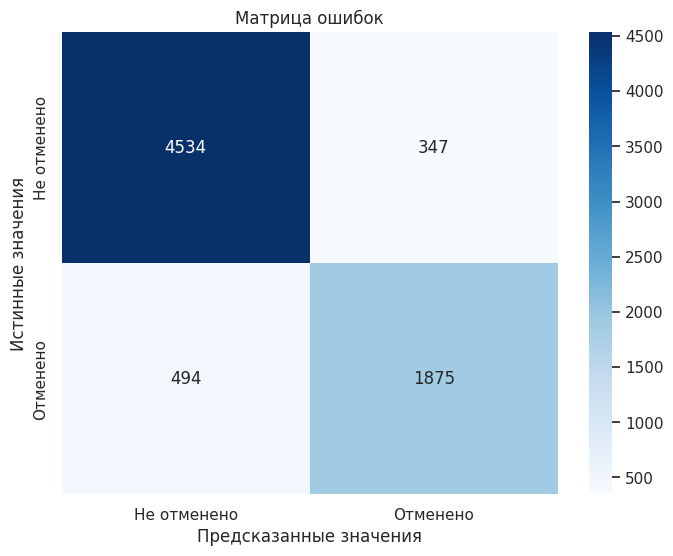

In [ ]:
# Визуализация матрицы ошибок

fig, ax = plt.subplots(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", ax=ax)
ax.set_title('Матрица ошибок')
ax.set_xlabel('Предсказанные значения')
ax.set_ylabel('Истинные значения')
ax.xaxis.set_ticklabels(['Не отменено', 'Отменено'])
ax.yaxis.set_ticklabels(['Не отменено', 'Отменено'])
plt.show()

**Модель прогнозирования на основе Random Forest:**

**Точность (Accuracy):** Модель достигла точности примерно 88.6%, что является довольно высоким показателем.

**Матрица ошибок (Confusion Matrix):**

- True Negative (TN): 4581 (предсказания о том, что бронирование не будет отменено, и оно действительно не отменено)
- False Positive (FP): 300 (ошибочные предсказания отмены бронирования)
- False Negative (FN): 476 (ошибочные предсказания о неотмене бронирования)
- True Positive (TP): 1893 (правильные предсказания отмены бронирования)

**Отчет о классификации:**

- Precision (Точность): 91% для класса 'не отменено' и 86% для класса 'отменено'.
- Recall (Полнота): 94% для класса 'не отменено' и 80% для класса 'отменено'.
- F1-Score: Сбалансированный показатель точности и полноты, составляющий 92% для класса 'не отменено' и 83% для класса 'отменено'.

Эти результаты показывают, что модель достаточно хорошо справляется с задачей прогнозирования отмены бронирований. Особенно высокий показатель точности для класса 'не отменено' может быть особенно полезен для отелей в контексте минимизации потерь от незаселения номеров.

# **Сравнительный анализ моделей Random forest и Логистической Регрессии:**

**Точность:**

Модель Random forest показала более высокую общую точность по сравнению с логистической регрессией.

**Precision и Recall:**

Random forest показал лучшие результаты по обеим метрикам для обоих классов (отменено и не отменено).

**F1-Score:**

Random forest также демонстрирует более высокие значения F1-Score, что указывает на более сбалансированное сочетание точности и полноты.

**Выводы:**

Модель Random forest лучше справляется с задачей прогнозирования отмены бронирования в данном наборе данных.
Логистическая регрессия, хотя и менее точна, может предложить более простую и интерпретируемую модель, что может быть полезно в определенных контекстах.
Выбор модели зависит от конкретных целей и требований к задаче. Если важна высокая точность и полнота, предпочтительнее модель случайного леса. Если важнее простота и интерпретируемость, можно рассмотреть логистическую регрессию.
Обе модели имеют свои преимущества и могут быть полезны в различных сценариях принятия решений.

# **Общие выводы о проделанном исследовании:**

- Была обнаружена значительная сезонная зависимость в отменах бронирований, что предоставляет возможность для сезонной корректировки цен и маркетинговых акций.


- Различные типы комнат и сегменты рынка демонстрируют разные уровни отмен, что подчеркивает необходимость сегментированного подхода к управлению инвентарем и ценообразованием.

- Срок бронирования и ценовая категория оказывают влияние на вероятность отмены, что может быть использовано для раннего выявления потенциальных отмен и оптимизации условий предзаказа.

- Специальные запросы и повторные бронирования коррелируют с более низким уровнем отмен, что указывает на более высокую степень лояльности и удовлетворенности этих клиентов.

# **Рекомендации по итогам проделанного исследования:**

1. **Гибкая Политика Ценообразования:** Разработка гибких ценовых стратегий, учитывающих сезонные колебания спроса и вероятности отмены.

2. **Целевой Маркетинг и Предложения:** Создание персонализированных предложений для различных сегментов рынка, особенно для тех, кто имеет низкий уровень отмен.

3. **Управление Рисками Отмен:** Внедрение системы раннего предупреждения для выявления потенциальных отмен и принятия мер по их предотвращению.
4. **Программы Лояльности:** Укрепление отношений с повторными клиентами через программы лояльности и предложения, способствующие удержанию.
5. **Оптимизация Политики Бронирования:** Корректировка политики бронирования для снижения вероятности отмены, включая возможность более выгодных условий для длительных бронирований.
6. **Использование Предиктивной Аналитики:** Применение прогностических моделей для оптимизации операционных и стратегических решений, связанных с управлением бронированиями.